In [1]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("churn.txt")
#import io
#from google.colab import files
#uploaded = files.upload()


#df = pd.read_csv(io.StringIO(uploaded['churn.txt'].decode('utf-8')))

df1 = df
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# EDA

In [9]:
print(len(df.columns))
df.columns

21


Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [10]:
print(len(df.describe().columns))
df.describe()

16


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
CatVar = list(set(df.columns) -  set(df.describe().columns))
CatVar

['State', 'Phone', 'VMail Plan', 'Churn?', "Int'l Plan"]

In [0]:
#df.replace(" ",np.nan,inplace=True)
#df.isnull().sum()

In [13]:
df.replace(to_replace=['yes','True.'], value=1, inplace=True)
df.replace(to_replace=['no','False.'],  value=0, inplace=True)
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [14]:
Counter(df['Churn?'])

Counter({0: 2850, 1: 483})

In [0]:
toDrop = ["Phone", "State"]
df.drop(toDrop,inplace=True,axis=1)

In [16]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [17]:
df = df.astype('float32')
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128.0,415.0,0.0,1.0,25.0,265.100006,110.0,45.070000,197.399994,99.0,16.780001,244.699997,91.0,11.01,10.0,3.0,2.70,1.0,0.0
1,107.0,415.0,0.0,1.0,26.0,161.600006,123.0,27.469999,195.500000,103.0,16.620001,254.399994,103.0,11.45,13.7,3.0,3.70,1.0,0.0
2,137.0,415.0,0.0,0.0,0.0,243.399994,114.0,41.380001,121.199997,110.0,10.300000,162.600006,104.0,7.32,12.2,5.0,3.29,0.0,0.0
3,84.0,408.0,1.0,0.0,0.0,299.399994,71.0,50.900002,61.900002,88.0,5.260000,196.899994,89.0,8.86,6.6,7.0,1.78,2.0,0.0
4,75.0,415.0,1.0,0.0,0.0,166.699997,113.0,28.340000,148.300003,122.0,12.610000,186.899994,121.0,8.41,10.1,3.0,2.73,3.0,0.0


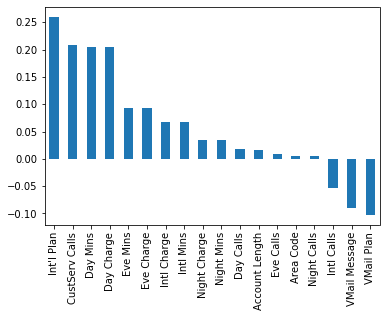

In [18]:
df.corr()["Churn?"].sort_values(ascending=False)[1:].plot(kind='bar')
#plt.show()

In [19]:
df.nunique()

Account Length     212
Area Code            3
Int'l Plan           2
VMail Plan           2
VMail Message       46
Day Mins          1667
Day Calls          119
Day Charge        1667
Eve Mins          1611
Eve Calls          123
Eve Charge        1440
Night Mins        1591
Night Calls        120
Night Charge       933
Intl Mins          162
Intl Calls          21
Intl Charge        162
CustServ Calls      10
Churn?               2
dtype: int64

In [20]:
df_churn = df[df['Churn?']==1.0]
df_churn.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,65.0,415.0,0.0,0.0,0.0,129.100006,137.0,21.950001,228.500000,83.0,19.420000,208.800003,111.0,9.40,12.7,6.0,3.43,4.0,1.0
15,161.0,415.0,0.0,0.0,0.0,332.899994,67.0,56.590000,317.799988,97.0,27.010000,160.600006,128.0,7.23,5.4,9.0,1.46,4.0,1.0
21,77.0,408.0,0.0,0.0,0.0,62.400002,89.0,10.610000,169.899994,121.0,14.440000,209.600006,64.0,9.43,5.7,6.0,1.54,5.0,1.0
33,12.0,408.0,0.0,0.0,0.0,249.600006,118.0,42.430000,252.399994,119.0,21.450001,280.200012,90.0,12.61,11.8,3.0,3.19,1.0,1.0
41,135.0,408.0,1.0,1.0,41.0,173.100006,85.0,29.430000,203.899994,107.0,17.330000,122.199997,78.0,5.50,14.6,15.0,3.94,0.0,1.0


In [21]:
(df_churn["Area Code"].value_counts())

415.0    236
510.0    125
408.0    122
Name: Area Code, dtype: int64

Text(0.5, 1.0, 'Percentage of People who Opted for VMail Plan and then Changed Service Providers')

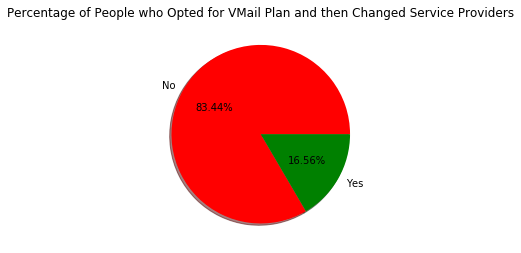

In [22]:
plt.figure(figsize=(4,6))
plt.pie(df_churn["VMail Plan"].value_counts(),labels=["No","Yes"],autopct='%.2f%%',colors=['r','g'],shadow=True)
plt.title("Percentage of People who Opted for VMail Plan and then Changed Service Providers")

Text(0.5, 1.0, 'Churn based on Region')

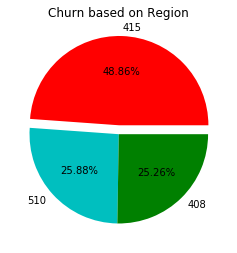

In [23]:
plt.figure(figsize=(4,6))
plt.pie(df_churn["Area Code"].value_counts(),labels=[415,510,408],autopct='%.2f%%',explode=[0.1,0,0],colors=['r','c','g'])
plt.title("Churn based on Region")

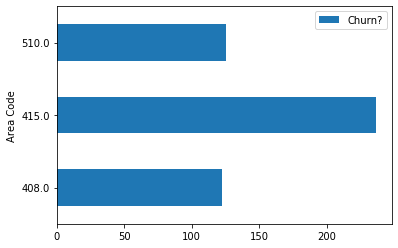

In [24]:
df_churn[["Area Code","Churn?"]].groupby("Area Code").sum().plot(kind='barh')

In [0]:
df["Total Min"] = df["Day Mins"] + df["Night Mins"]
df_churn["Total Min"] = df_churn["Day Mins"] + df_churn["Night Mins"]
mu = df["Total Min"].describe()['mean']
sigma = df["Total Min"].describe()['std']

In [26]:
df['z'] = abs((df['Total Min'] - mu)/sigma)
df_churn['z'] = abs((df_churn['Total Min'] - mu)/sigma)
df_churn.z.describe()

count    483.000000
mean       1.042680
std        0.711116
min        0.014055
25%        0.481967
50%        0.909520
75%        1.530480
max        3.369110
Name: z, dtype: float64

In [27]:
vh1 = len(df[df['z']>3])
h1 =  len(df[2<df['z']]) - vh1
m1 =  len(df[1<df['z']]) - vh1 - h1
l1 =  len(df[0.5<df['z']]) - vh1 - h1 - m1
vl1 = len(df[df['z']<0.5])

li1 = [vh1,h1,m1,l1,vl1]
li1

[8, 149, 880, 980, 1316]

In [28]:
vh = len(df_churn[df_churn['z']>3])
h =  len(df_churn[2<df_churn['z']]) - vh
m =  len(df_churn[1<df_churn['z']]) - vh - h
l =  len(df_churn[0.5<df_churn['z']]) - vh - h - m
vl = len(df_churn[df_churn['z']<0.5])

li = [vh,h,m,l,vl]
li

[4, 50, 167, 135, 127]

([<matplotlib.patches.Wedge at 0x7fcd61f93390>,
 [Text(0.34992552967256096, 1.0428576718245772, 'Very High'),
  Text(-1.0803142554572591, -0.2071741042114776, 'High'),
  Text(-0.07809909587672521, -1.0972240114139127, 'Moderate'),
  Text(0.746441967283856, -0.8079754881661986, 'Low'),
  Text(1.0682901681075159, -0.2622138759196695, 'Very Low')])

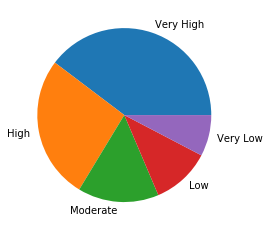

In [29]:
plt.pie([vh/vh1,h/h1,m/m1,l/l1,vl/vl1],labels=["Very High","High","Moderate","Low","Very Low"])

<BarContainer object of 5 artists>

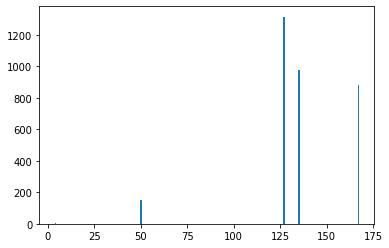

In [30]:
plt.bar(li,li1)

# Predictions

In [32]:
df1.astype('float32').head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128.0,415.0,0.0,1.0,25.0,265.100006,110.0,45.070000,197.399994,99.0,16.780001,244.699997,91.0,11.01,10.0,3.0,2.70,1.0,0.0
1,107.0,415.0,0.0,1.0,26.0,161.600006,123.0,27.469999,195.500000,103.0,16.620001,254.399994,103.0,11.45,13.7,3.0,3.70,1.0,0.0
2,137.0,415.0,0.0,0.0,0.0,243.399994,114.0,41.380001,121.199997,110.0,10.300000,162.600006,104.0,7.32,12.2,5.0,3.29,0.0,0.0
3,84.0,408.0,1.0,0.0,0.0,299.399994,71.0,50.900002,61.900002,88.0,5.260000,196.899994,89.0,8.86,6.6,7.0,1.78,2.0,0.0
4,75.0,415.0,1.0,0.0,0.0,166.699997,113.0,28.340000,148.300003,122.0,12.610000,186.899994,121.0,8.41,10.1,3.0,2.73,3.0,0.0


In [0]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [0]:
sc = StandardScaler().fit_transform(X,y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [36]:
clf1 = LogisticRegression().fit(X_train,y_train)
print("Train Accuracy = " + str(clf1.score(X_train,y_train)))
print("Test Accuracy = " + str(clf1.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf1.predict(X_test),y_test)))

Train Accuracy = 0.8559519839946649
Test Accuracy = 0.8502994011976048
F1 Score = 0.10714285714285714


In [37]:
clf2 = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
print("Train Accuracy = " + str(clf2.score(X_train,y_train)))
print("Test Accuracy = " + str(clf2.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf2.predict(X_test),y_test)))

Train Accuracy = 0.905301767255752
Test Accuracy = 0.844311377245509
F1 Score = 0.3333333333333333


In [38]:
clf3 = MLPClassifier(random_state=0).fit(X_train,y_train)
print("Train Accuracy = " + str(clf3.score(X_train,y_train)))
print("Test Accuracy = " + str(clf3.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf3.predict(X_test),y_test)))

Train Accuracy = 0.8916305435145049
Test Accuracy = 0.8922155688622755
F1 Score = 0.4857142857142857


In [39]:
clf4 = MLPClassifier(hidden_layer_sizes=(100,100,100,75,50,50),random_state=0,alpha=0.1).fit(X_train,y_train)
print("Train Accuracy = " + str(clf4.score(X_train,y_train)))
print("Test Accuracy = " + str(clf4.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf4.predict(X_test),y_test)))

Train Accuracy = 0.9436478826275425
Test Accuracy = 0.9101796407185628
F1 Score = 0.5833333333333334


In [40]:
clf5 = DecisionTreeClassifier(max_depth=8,random_state=0).fit(X_train,y_train)                          
print("Train Accuracy = " + str(clf5.score(X_train,y_train)))
print("Test Accuracy = " + str(clf5.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf5.predict(X_test),y_test)))

Train Accuracy = 0.976325441813938
Test Accuracy = 0.9461077844311377
F1 Score = 0.8043478260869564


In [41]:
clf6 = GradientBoostingClassifier().fit(X_train,y_train)                 #100 Estimators   
print("Train Accuracy = " + str(clf6.score(X_train,y_train)))
print("Test Accuracy = " + str(clf6.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf6.predict(X_test),y_test)))

Train Accuracy = 0.9739913304434812
Test Accuracy = 0.9580838323353293
F1 Score = 0.8478260869565216


In [42]:
clf6 = GradientBoostingClassifier(n_estimators=1500,random_state=0).fit(X_train,y_train)                    
print("Train Accuracy = " + str(clf6.score(X_train,y_train)))
print("Test Accuracy = " + str(clf6.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf6.predict(X_test),y_test)))

Train Accuracy = 1.0
Test Accuracy = 0.9610778443113772
F1 Score = 0.8602150537634408


In [43]:
clf7 = RandomForestClassifier(n_estimators = 17, random_state=0).fit(X_train,y_train)                          
print("Train Accuracy = " + str(clf7.score(X_train,y_train)))
print("Test Accuracy = " + str(clf7.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf7.predict(X_test),y_test)))

Train Accuracy = 0.9966655551850617
Test Accuracy = 0.9640718562874252
F1 Score = 0.8666666666666666


In [44]:
from sklearn.svm import SVC
clf8 = SVC(gamma=0.00007).fit(X_train,y_train)
print("Train Accuracy = " + str(clf8.score(X_train,y_train)))
print("Test Accuracy = " + str(clf8.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf8.predict(X_test),y_test)))

Train Accuracy = 0.8956318772924308
Test Accuracy = 0.8892215568862275
F1 Score = 0.4126984126984127


In [45]:
grid = {'C':[100,1000,10000], 'gamma':[1e-6,1e-5,1e-4]}

clf9 = GridSearchCV(SVC(),grid).fit(X_train,y_train)
print("Train Accuracy = " + str(clf9.score(X_train,y_train)))
print("Test Accuracy = " + str(clf9.score(X_test,y_test)))
print("F1 Score = " + str(f1_score(clf9.predict(X_test),y_test)))

Train Accuracy = 0.9309769923307769
Test Accuracy = 0.907185628742515
F1 Score = 0.5974025974025974


In [46]:
clf9.best_params_

{'C': 1000, 'gamma': 1e-05}

In [47]:
print(classification_report(y_test,clf7.predict(X_test)))                    #Random Forest

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.95      0.80      0.87        49

    accuracy                           0.96       334
   macro avg       0.96      0.89      0.92       334
weighted avg       0.96      0.96      0.96       334



In [48]:
confusion_matrix(y_test,clf7.predict(X_test))

array([[283,   2],
       [ 10,  39]])

In [49]:
100*confusion_matrix(y_test,clf7.predict(X_test))/len(X_test)                    #Percentages

array([[84.73053892,  0.5988024 ],
       [ 2.99401198, 11.67664671]])

### Visualizing Decision Tree

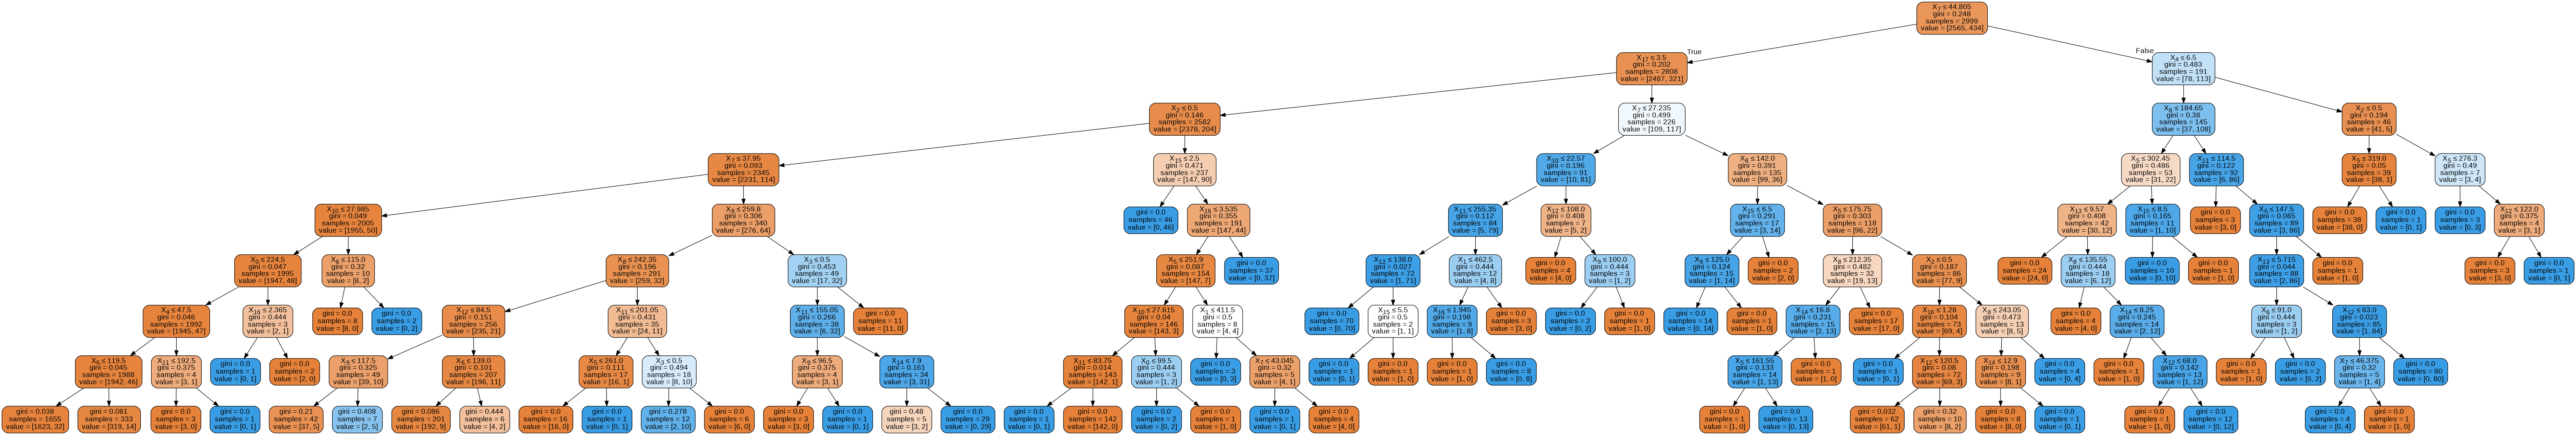

In [63]:
from sklearn.externals.six import StringIO                
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf5, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
